# Question 1

The D-dimensional Schwefel function:

$$f(x_1, x_2, \cdots,x_D) = 418.9829D - \sum_i^D x_i\sin(\sqrt{|x_i|})$$

where $x_i\in[-500, 500]$ for $i=1,2,\cdots,D$.

*For debugging*: The global minimum is 0, which is reached at $x_i=420.9687$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Schwefel(X):
    return 418.9829 * len(X) - np.sum(X* np.sin(np.sqrt(np.abs(X))),axis = 0)

# for visualization if you want
def plot_surface(func, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x,y = np.meshgrid(a, b)
    z = func(np.array([x, y]))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(x, y, z)

0.00012727837474812986

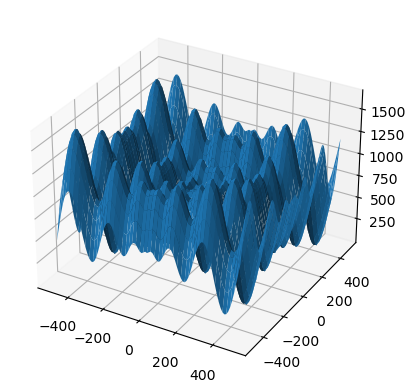

In [3]:
 #X = np.empty(2)
plot_surface(Schwefel, x_min=-500, x_max=500, y_min=-500, y_max=500)
Schwefel(np.array([420.9687, 420.9687, 420.9687, 420.9687, 420.9687, 420.9687, 420.9687, 420.9687, 420.9687, 420.9687]))

In [4]:
def SA(solution, func, schedule, delta, boundary, n_iter=10, report_interval=None):
    """ 
    Simulated Annealing for minimization
    
    Parameters
    ----------
    solution: np.ndarray
        Initial guess
    func: Callable
        Function to minimize
    schedule: np.ndarray
        An array of temperatures for simulated annealing
    delta: float
        Magnitude of random displacement
    boundary: tuple
        Boundary of the variables to minimize. (lowerbound,upperbound)
    n_iter: int
        Number of random displacement move in each temperature
    report_interavl: int
        Number of temperature steps to report result
    
    Returns
    -------
    res: dict
        Minimized point and its evaulation value
    """
    
    best_solution = solution.copy()
    lowest_eval = func(best_solution)
    
    for idx, temp in enumerate(schedule):
        if report_interval is not None and ((idx + 1) % report_interval == 0 or idx == 0):
            msg = (
                f"{idx + 1}/{len(schedule)}, Temp: {temp:.2f}, "
                f"Best solution: {best_solution}, Value: {lowest_eval:.7f}"
            )
            print(msg)
        
        for n in range(n_iter):
            trial = solution.copy()
            # do a random displacement
            trial += delta*(2*np.random.random(trial.shape)-1)
            if np.all(trial >= boundary[0]) and np.all(trial <= boundary[1]):
                # fill in acceptance criterion
                if np.exp(-(func(trial)-func(solution))/temp)>np.random.random():
                    solution = trial
                    if func(solution) < lowest_eval:
                        # update solution here
                        best_solution = solution.copy()
                        lowest_eval = func(best_solution)
                        
    return {"solution":best_solution, "evaluation":lowest_eval}

In [5]:
starting = 500 * (np.random.random(10) * 2 - 1) #starting point

## (a)

*For debugging*: 

Length of schedule 5941 for 30K, 5981 for 10K (both initial temperature and final temperature are included in the schedule). The function evaluation of your solution usually falls in the range of 2000~4000 with `delta=0.5` and `n_iter=10`. 

In [6]:
def linear_cooling(init_temp, final_temp, alpha):
    length = int(-(final_temp-init_temp)/alpha)+1
    return np.linspace(init_temp, final_temp, length)

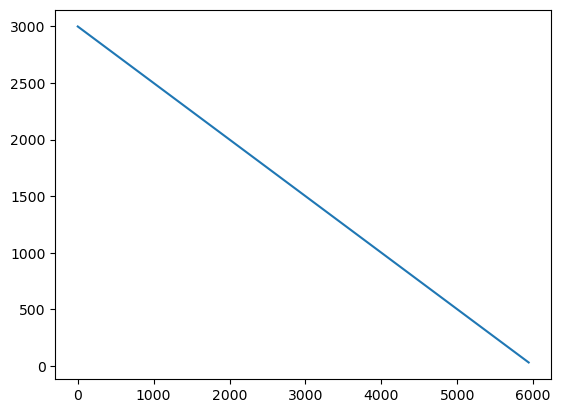

In [7]:
#3000k~30k,alpha=0.5
cooling_sched_30k = linear_cooling(3000, 30, 0.5)
plt.plot(cooling_sched_30k)

In [8]:
#linear cooling schedule 3000k~30k

#1st 
print(f"\nFirst run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA1 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 1500)
print(ThirtyK_SA1)

#2nd
print(f"\nSecond run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA2 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 1500)
print(ThirtyK_SA2)

#3rd
print(f"\nThird run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA3 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 1500)
print(ThirtyK_SA3)

#4th
print(f"\nForth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA4 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 1500)
print(ThirtyK_SA4)

#5th
print(f"\nFifth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA5 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 1500)
print(ThirtyK_SA5)


First run, cooling schedule: 5941
1/5941, Temp: 3000.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   88.27670371
 -409.19035076  -22.63694417 -437.36311527 -318.71144704  224.69621118], Value: 4711.1992264
1500/5941, Temp: 2250.50, Best solution: [ 234.57220577 -243.32527068  162.21405943  476.01787698   85.18637833
 -426.52159703  -47.6444588  -491.17260356 -290.29105957  204.43790608], Value: 3875.9420480
3000/5941, Temp: 1500.50, Best solution: [ 234.57220577 -243.32527068  162.21405943  476.01787698   85.18637833
 -426.52159703  -47.6444588  -491.17260356 -290.29105957  204.43790608], Value: 3875.9420480
4500/5941, Temp: 750.50, Best solution: [ 235.03241309 -131.08682292  212.79005379  485.94758579   96.60782847
 -439.58255876  -28.76355924 -498.8495717  -324.08321225  193.51444786], Value: 3610.8183314
{'solution': array([ 228.39845658, -158.23008032,  226.40558974,  471.3908484 ,
        171.32630789, -432.14896596,  -16.61385847, -499.43282024,
  

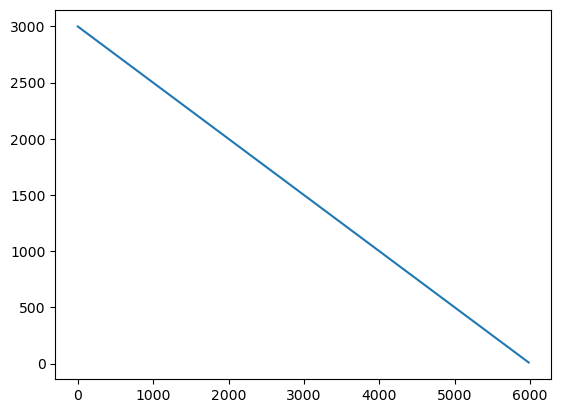

In [9]:
#3000k~10k,alpha=0.5
cooling_sched_10k = linear_cooling(3000, 10, 0.5)
plt.plot(cooling_sched_10k)

In [10]:
#linear cooling schedule 3000k~10k
#1st 
print(f"\nFirst run, cooling schedule: {len(cooling_sched_10k)}")
TenK_SA1 = SA(starting, Schwefel, cooling_sched_10k, 0.5, (-500,500), 10, 2000)
print(TenK_SA1)

#2nd
print(f"\nSecond run, cooling schedule: {len(cooling_sched_10k)}")
TenK_SA2 = SA(starting, Schwefel, cooling_sched_10k, 0.5, (-500,500), 10, 2000)
print(TenK_SA2)

#3rd
print(f"\nThird run, cooling schedule: {len(cooling_sched_10k)}")
TenK_SA3 = SA(starting, Schwefel, cooling_sched_10k, 0.5, (-500,500), 10, 2000)
print(TenK_SA3)

#4th
print(f"\nForth run, cooling schedule: {len(cooling_sched_10k)}")
TenK_SA4 = SA(starting, Schwefel, cooling_sched_10k, 0.5, (-500,500), 10, 2000)
print(TenK_SA4)

#5th
print(f"\nForth run, cooling schedule: {len(cooling_sched_10k)}")
TenK_SA5 = SA(starting, Schwefel, cooling_sched_10k, 0.5, (-500,500), 10, 2000)
print(TenK_SA5)


First run, cooling schedule: 5981
1/5981, Temp: 3000.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   88.27670371
 -409.19035076  -22.63694417 -437.36311527 -318.71144704  224.69621118], Value: 4711.1992264
2000/5981, Temp: 2000.50, Best solution: [ 262.6939031  -300.62454255  172.3837515   477.04915812   83.60777343
 -451.67380986  -18.71145958 -448.54185644 -310.47815623  217.93469544], Value: 3972.4132540
4000/5981, Temp: 1000.50, Best solution: [ 297.52161649 -324.50210001  221.93370897  460.65459186   62.86969103
 -493.17429512   14.35628837 -420.79568123 -312.13541945  221.91831545], Value: 3662.8215846
{'solution': array([ 251.86606587, -304.34996177,  222.5729785 ,  441.37675159,
        -53.90792168, -421.0345323 ,  -28.34381757, -499.84540776,
       -309.64445833,  193.69329494]), 'evaluation': 3186.049880354835}

Second run, cooling schedule: 5981
1/5981, Temp: 3000.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   8

In [11]:
# Print average & standard deviation of minimized values of 3 runs
#30k
values_30k = [ThirtyK_SA1['evaluation'], ThirtyK_SA2['evaluation'], ThirtyK_SA3['evaluation'], ThirtyK_SA4['evaluation'], ThirtyK_SA5['evaluation']]
print(f"Minimized values at 30K: {np.average(values_30k):.7f} +/- {np.std(values_30k):.7f}")
#10k
values_10k = [TenK_SA1['evaluation'], TenK_SA2['evaluation'], TenK_SA3['evaluation'], TenK_SA4['evaluation'], TenK_SA5['evaluation']]
print(f"Minimized values at 10K: {np.average(values_10k):.7f} +/- {np.std(values_10k):.7f}")

Minimized values at 30K: 3385.5208468 +/- 225.2590037
Minimized values at 10K: 2987.0076667 +/- 336.7139082


In [12]:
"""
Yes, the value decreases when cooling to a low temperature. This means the algorithm finds a better solution.
However, the linear cooling schedule has its limits. Sometimes, it stops at the local minimum, even when the temperature goes down.
"""

'\nYes, the value decreases when cooling to a low temperature. This means the algorithm finds a better solution.\nHowever, the linear cooling schedule has its limits. Sometimes, it stops at the local minimum, even when the temperature goes down.\n'

## (b)

*For debugging*:

The final temperature should be 326.10415680714726 (starting from 6000K) or 309.29382323518576 (starting from 3000K).

In [13]:
def log_cooling(init_temp, sigma, k):
    # Initialize an array to hold the cooling schedule
    cooling_schedule = np.zeros((k))
    # Calculate each temperature and store it with its corresponding k value
    for i in range(k):
        cooling_schedule[i] = init_temp / (1 + init_temp * np.log(1 + i) / (3 * sigma))  # Calculate the temperature
    return np.array(cooling_schedule)

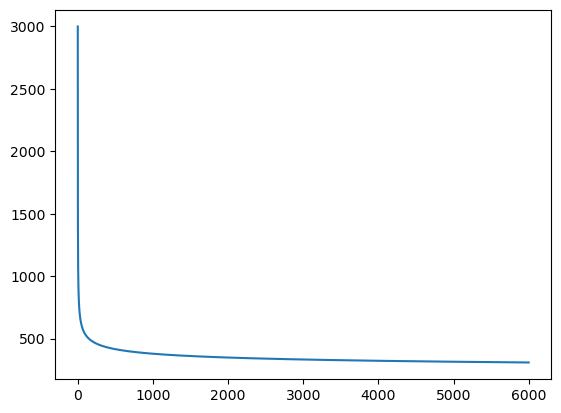

In [14]:
#cooling schedule:3000k~30k
cooling_sched_30k= log_cooling(3000, 1000, 6000)
plt.plot(cooling_sched_30k, label='Initial Temp 3000K')

In [15]:
#logarithmic cooling schedule 3000k~30k

#1st 
print(f"\nFirst run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA1_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA1_3000)

#2nd
print(f"\nSecond run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA2_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA2_3000)

#3rd
print(f"\nThird run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA3_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA3_3000)

#4th
print(f"\nForth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA4_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA4_3000)

#5th
print(f"\nFifth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA5_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA5_3000)


First run, cooling schedule: 6000
1/6000, Temp: 3000.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   88.27670371
 -409.19035076  -22.63694417 -437.36311527 -318.71144704  224.69621118], Value: 4711.1992264
2000/6000, Temp: 348.80, Best solution: [ 277.9850841  -238.60793967  134.9167346   437.75627222   90.46796097
 -431.49123752   -2.78224617 -499.37341539 -345.47037999  204.66339252], Value: 4156.3857077
4000/6000, Temp: 322.79, Best solution: [ 269.23629076 -235.45595363   86.82933302  422.8099574    92.85712541
 -494.99654062  -22.40860619 -480.22573527 -307.70685654  156.72605323], Value: 3637.6261369
6000/6000, Temp: 309.29, Best solution: [ 211.26458482 -250.87847191   12.31221199  388.11821426  108.34148563
 -492.24890806   41.24953829 -497.83029478 -302.91809749  201.27237506], Value: 3005.0227469
{'solution': array([ 211.26458482, -250.87847191,   12.31221199,  388.11821426,
        108.34148563, -492.24890806,   41.24953829, -497.83029478,
    

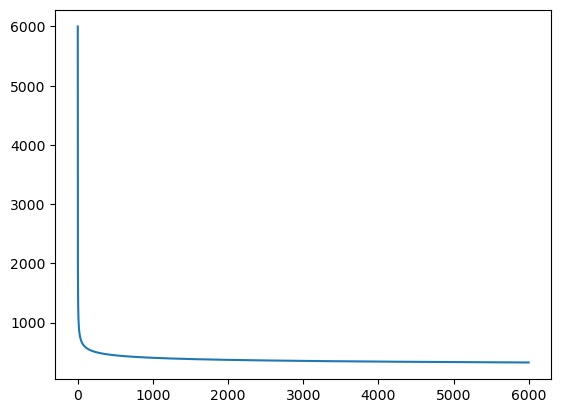

In [16]:
#cooling schedule:6000k~30k
cooling_sched_30k= log_cooling(6000, 1000, 6000)
plt.plot(cooling_sched_30k, label='Initial Temp 6000K')

In [17]:
#logarithmic cooling schedule 6000k~30k

#1st 
print(f"\nFirst run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA1_6000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA1_6000)

#2nd
print(f"\nSecond run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA2_6000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10,2000)
print(ThirtyK_SA2_6000)

#3rd
print(f"\nThird run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA3_6000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA3_6000)

#4th
print(f"\nForth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA4_6000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA4_6000)

#5th
print(f"\nFifth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA5_6000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA5_6000)


First run, cooling schedule: 6000
1/6000, Temp: 6000.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   88.27670371
 -409.19035076  -22.63694417 -437.36311527 -318.71144704  224.69621118], Value: 4711.1992264
2000/6000, Temp: 370.33, Best solution: [ 235.21847409 -282.79476654  183.22831069  455.94173467  102.06685351
 -413.84964366    4.17297722 -414.90525656 -303.10228638  210.70728906], Value: 3819.6020324
4000/6000, Temp: 341.14, Best solution: [ 215.77682185 -271.84353698  127.26278903  485.07994848  193.3371796
 -296.29694688  -16.86275921 -484.06306312 -302.12876832  201.22562281], Value: 2949.1460823
6000/6000, Temp: 326.10, Best solution: [ 232.03897811 -281.8082593   187.20267228  473.28190662  205.74244905
 -261.3577386    -1.18935881 -496.4041032  -297.22811477  197.20028767], Value: 2605.5683100
{'solution': array([ 232.03897811, -281.8082593 ,  187.20267228,  473.28190662,
        205.74244905, -261.3577386 ,   -1.18935881, -496.4041032 ,
     

In [18]:
# Print average & standard deviation of minimized values of 3 runs
#30k
values_3000 = [ThirtyK_SA1_3000['evaluation'], ThirtyK_SA2_3000['evaluation'], ThirtyK_SA3_3000['evaluation']]
print(f"Minimized values at 30K: {np.average(values_3000):.7f} +/- {np.std(values_3000):.7f}")
#10k
values_6000 = [ThirtyK_SA1_6000['evaluation'], ThirtyK_SA2_6000['evaluation'], ThirtyK_SA3_6000['evaluation']]
print(f"Minimized values at 10K: {np.average(values_6000):.7f} +/- {np.std(values_6000):.7f}")

Minimized values at 30K: 3368.8557021 +/- 362.8535823
Minimized values at 10K: 2864.9660795 +/- 371.2480881


In [19]:
"""
A logarithmic cooling schedule is not better than linear cooling because there is no significant difference between these two.
"""

'\nA logarithmic cooling schedule is not better than linear cooling because there is no significant difference between these two.\n'

## (c) 

In [20]:
# construct your cooling schedule
#3000cos(x/2000)+3000
def cos_cooling(k):
    # Initialize an array to hold the cooling schedule
    cooling_schedule = np.zeros((k))
    # Calculate each temperature and store it with its corresponding k value
    for i in range(k):
        cooling_schedule[i] = np.abs(1200*np.cos(i/2000) - 300*np.cos(i/250) - 200*np.cos(i/50) + 80*np.cos(i/16) +1500) # Calculate the temperature
    return np.array(cooling_schedule)
#schedule = 

[2280.         2279.88604952 2279.544792   ...   26.91299071   21.7423969
   16.34052834]


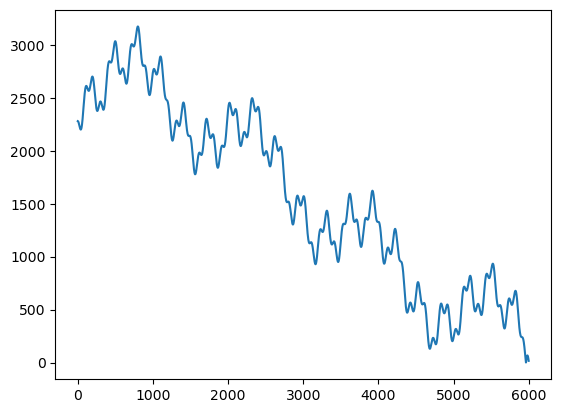

In [21]:
#cooling schedule:3000k~30k
cooling_sched_30k= cos_cooling(6000)
print(cooling_sched_30k)
plt.plot(cooling_sched_30k, label='Initial Temp 3000K')

In [22]:
#cosine cooling schedule 3000k~30k

#1st 
print(f"\nFirst run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA1_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA1_3000)

#2nd
print(f"\nSecond run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA2_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA2_3000)

#3rd
print(f"\nThird run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA3_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA3_3000)

#4th
print(f"\nForth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA4_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA4_3000)

#5th
print(f"\nFifth run, cooling schedule: {len(cooling_sched_30k)}")
ThirtyK_SA5_3000 = SA(starting, Schwefel, cooling_sched_30k, 0.5, (-500,500), 10, 2000)
print(ThirtyK_SA5_3000)


First run, cooling schedule: 6000
1/6000, Temp: 2280.00, Best solution: [ 257.28368712 -248.63670091  165.50438407  497.62851091   88.27670371
 -409.19035076  -22.63694417 -437.36311527 -318.71144704  224.69621118], Value: 4711.1992264
2000/6000, Temp: 2381.53, Best solution: [ 241.81067913 -250.51970541  183.93688814  481.82526531  100.97389869
 -402.10312146  -13.71885491 -452.32580142 -309.65834571  234.68048809], Value: 4291.1328138
4000/6000, Temp: 1329.25, Best solution: [ 206.94095815 -245.67923793  264.40097961  478.15278834   84.53294461
 -468.75425999   12.7746918  -466.72009017 -331.01189431  254.55637522], Value: 4256.1647672
6000/6000, Temp: 16.34, Best solution: [ 190.77717054 -225.7123446   294.69718588  447.18686083   85.67447554
 -490.4217109    -6.25598732 -497.24148737 -339.68883455  322.60841249], Value: 3985.7674285
{'solution': array([ 190.77717054, -225.7123446 ,  294.69718588,  447.18686083,
         85.67447554, -490.4217109 ,   -6.25598732, -497.24148737,
   

In [23]:
# Print average & standard deviation of minimized values of 3 runs
#30k
values_3000 = [ThirtyK_SA1_3000['evaluation'], ThirtyK_SA2_3000['evaluation'], ThirtyK_SA3_3000['evaluation'], ThirtyK_SA4_3000['evaluation'], ThirtyK_SA5_3000['evaluation']]
print(f"Minimized values at 30K: {np.average(values_3000)} +/- {np.std(values_3000)}")

Minimized values at 30K: 3414.757019270063 +/- 441.6324697020228


In [24]:
# Run CG on CSA answers
import scipy
solution_3000 = [ThirtyK_SA1_3000['solution'], ThirtyK_SA2_3000['solution'], ThirtyK_SA3_3000['solution'], ThirtyK_SA4_3000['solution'], ThirtyK_SA5_3000['solution']]
solution_CG = []
evaluation_CG = []

for i in range(5):
    starting_point = solution_3000[i]
    SA_CG = scipy.optimize.minimize(Schwefel, starting_point, args=(), method='CG', tol= 1e-5)
    solution_CG.append(SA_CG['x'])
    evaluation_CG.append(SA_CG['fun'])

print(solution_CG)
print(evaluation_CG)
print(f"Minimized values at 30K: {np.average(evaluation_CG)} +/- {np.std(evaluation_CG)}")

[array([ 203.81422806, -302.52493366,  203.81423219,  420.96874603,
         65.54781881, -559.14863592,  -25.87739476, -559.14865941,
       -302.52488322,  420.96876093]), array([ 420.96876825, -302.52494316,  203.81427318,  420.96878733,
        203.81428647, -559.14862115, -124.82932673, -559.14857838,
       -302.5249559 ,  203.81424802]), array([ 203.81425922, -302.52493239,  203.81426007,  420.96871837,
          5.23920806, -559.14859231,  -25.87743127, -302.52495206,
       -302.52496262,  203.8142665 ]), array([ 203.81428341, -302.52495031,  203.81428334,  420.9687175 ,
        203.81425903, -302.52495084,  -25.87737595, -302.52493881,
       -302.52487088,  203.81420371]), array([ 203.81427936, -302.5249389 ,  203.81426049,  420.96879742,
        203.81428529, -302.5248122 ,   65.5479147 , -559.14866648,
       -302.52511366,  203.81423842])]
[1145.0511477837244, 908.0496985625928, 1678.4952420511086, 1737.2120703465616, 1441.0453040725843]
Minimized values at 30K: 1381.9706

In [25]:
"""
Yes, CSA + CG can find a better solution.
"""

'\nYes, CSA + CG can find a better solution.\n'

# Question 2

## (a)

In [26]:
"""
Encoding A
Solution 3: Fitness= 30; Vector= 1000
Solution 4: Fitness= 31; Vector= 0010
Solution 5: Fitness= 30; Vector= 0001
Schema A: schema = *0**, length= 2-2 = 0, order= 1

Encoding B
Solution 3: Fitness= 30; Vector= 1101
Solution 4: Fitness= 31; Vector= 1011
Solution 5: Fitness= 30; Vector= 1111
Schema B: schema = 1***1, length= 5-1 = 4, order= 2

Schema A is a better way to encode since it has a shorter length and lower order.
"""

'\nEncoding A\nSolution 3: Fitness= 30; Vector= 1000\nSolution 4: Fitness= 31; Vector= 0010\nSolution 5: Fitness= 30; Vector= 0001\nSchema A: schema = *0**, length= 2-2 = 0, order= 1\n\nEncoding B\nSolution 3: Fitness= 30; Vector= 1101\nSolution 4: Fitness= 31; Vector= 1011\nSolution 5: Fitness= 30; Vector= 1111\nSchema B: schema = 1***1, length= 5-1 = 4, order= 2\n\nSchema A is a better way to encode since it has a shorter length and lower order.\n'

## (b)

In [27]:
import pandas as pd


solution_dict = {
    "1011": 0, "0011": 1, "1001": 2, "1000": 3,
    "0010": 4, "0001": 5, "0000": 6, "1010": 7,
    "0100": 8, "1100": 9, "0101":10, "0110":11,
    "0111":12, "1101":13, "1110":14, "1111":15
}


def func(vec):
    x = solution_dict[vec]
    return -x ** 2 + 8 * x + 15


def one_point_crossover(parent1, parent2, point):
    parent1_split = [*parent1]
    parent2_split = [*parent2]
    parent1_new = []
    parent2_new = []
    
    for i in range(point,len(parent1)):
        temp = parent1_split[i]
        parent1_split[i] = parent2_split[i]
        parent2_split[i] = temp

    for j in range(len(parent1)):
        parent1_new += parent1_split[j]
        parent2_new += parent2_split[j]

    parent1_new = ''.join(parent1_new)
    parent2_new = ''.join(parent2_new)
    return parent1_new, parent2_new
    
def evaluate_population(pop):
    df = pd.DataFrame({
        "Solutions": [solution_dict[vec] for vec in pop],
        "Vectors": pop,
        "Fitness": [func(vec) for vec in pop]
    })
    df.sort_values(by=["Fitness"], ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    print(f"Total Fitness: {np.sum(df['Fitness'])}")
    print(f"Best Solution: {df.loc[0, 'Solutions']} (with fitness {df.loc[0, 'Fitness']})")
    return df

In [28]:
solution_dict['1011']

0

In [29]:
# Make elements as a class
class Population:
    def __init__(self, solution, fitness, vector):
        self.solution = solution
        self.fitness = fitness
        self.vector = vector
    def __repr__(self):
        return repr((self.solution, self.fitness, self.vector))

#pair members
def pair_members(population):
    population_sorted_b = sorted(population, key = lambda Population: Population.fitness, reverse=True)
    population_sorted_f= sorted(population, key = lambda Population: Population.fitness, reverse=False)
    pair = []
    temp = []
    for i in range(int(len(population)/2)):
        temp = [population_sorted_b[i].vector , population_sorted_f[i].vector]
        pair.append(temp)
    return pair

In [30]:
population_original = [
    Population(10, func("0101"),"0101"),
    Population(1 , func("0011"),"0011"),
    Population(15, func("1111"),"1111"),
    Population(6 , func("0000"),"0000"),
    Population(0 , func("1011"),"1011"),
    Population(9 , func("1100"),"1100")
]
pop_vec_original = [individual.vector for individual in population_original]

population_sorted_b= sorted(population_original, key = lambda Population: Population.fitness, reverse=True)
pair_QB = pair_members(population_original)

print(population_sorted_b)
print(pair_QB)



[(6, 27, '0000'), (1, 22, '0011'), (0, 15, '1011'), (9, 6, '1100'), (10, -5, '0101'), (15, -90, '1111')]
[['0000', '1111'], ['0011', '0101'], ['1011', '1100']]


In [31]:
"""
(6, 27, '0000') is paired with (15, -90, '1111')
(1, 22, '0011') is paired with (10, -5, '0101')
(0, 15, '1011') is paired with (9, 6, '1100')
"""

"\n(6, 27, '0000') is paired with (15, -90, '1111')\n(1, 22, '0011') is paired with (10, -5, '0101')\n(0, 15, '1011') is paired with (9, 6, '1100')\n"

*Hint*: Use `list.sort(key=...)` to sort a list of population according to its evaluation value. Maybe you can find [this](https://docs.python.org/3/howto/sorting.html#key-functions) useful.

## (c)

*For debugging*: Use the following function to test `one_point_crossover()`

In [32]:
def test_one_point_crossover():
    c1, c2 = one_point_crossover("0000", "1111", 1)
    if {c1, c2} == {"1000", "0111"}:
        print("Well done!")
    else:
        raise Exception("Wrong implementation")

test_one_point_crossover()

Well done!


In [33]:
# The new population after one point crossover
def crossover_population(population,pair,point):
    population_new = []
    population_vectors = []
    
    for i in range(int(len(population)/2)):
        parent1 = pair[i][0]
        parent2 = pair[i][1]
        parent1_new, parent2_new = one_point_crossover(parent1, parent2, point)
        population_vectors.append(parent1_new)
        population_vectors.append(parent2_new)
        
    #for new vector
    for vector in population_vectors:
        new_solution = solution_dict[vector]  # Get the solution number from your dictionary
        fitness = func(vector)  # Calculate the fitness
        population_new.append(Population(new_solution, fitness, vector))
        
    return population_new,population_vectors

# Check if there is any new solution
def compare_2_population(new_population, old_population):
    old_vectors = [individual.vector for individual in old_population]  # Extract vectors from old_population
    new_individual = []  # List to hold new individuals not in old_population
    
    for individual in new_population:
        if individual.vector not in old_vectors:  # Check if the vector is not in the old_vectors list
            new_individual.append(individual)  # If not, it's a new individual
            print(f"{individual.solution} (vector: {individual.vector}) is a new solution!")
    if not new_individual:
        print("There isn't any new solution.")
    
    return new_individual

 

In [34]:
#After the one point crossover, "0000" becomes "1000" and "1111" becomes "0111"
population_QC, pop_vec_QC = crossover_population(population_original,pair_QB,1)

#check if there is any new solution
individual_new = compare_2_population(population_QC, population_original)
print(individual_new)
evaluate_population(pop_vec_original)
evaluate_population(pop_vec_QC)

12 (vector: 0111) is a new solution!
3 (vector: 1000) is a new solution!
[(12, -33, '0111'), (3, 30, '1000')]
Total Fitness: -25
Best Solution: 6 (with fitness 27)
Total Fitness: 35
Best Solution: 3 (with fitness 30)


,Solutions,Vectors,Fitness
0,3,1000,30
1,1,0011,22
2,0,1011,15
3,9,1100,6
4,10,0101,-5
5,12,0111,-33


In [35]:
"""
(1) Yes, we got two new solutions: 3 and 12. Their fitness are 30 and -33
(2) Yes, we increases the overall fitness.
(3) The best solution is 3.

"""

'\n(1) Yes, we got two new solutions: 3 and 12. Their fitness are 30 and -33\n(2) Yes, we increases the overall fitness.\n(3) The best solution is 3.\n\n'

## (d)

In [36]:
def mutate(vec, point):
    vec_split = [*vec]
    if vec_split[point] == '1':
        vec_split[point] = '0'
    else:
        vec_split[point] = '1'
    vec_new = ''.join(vec_split)
    return vec_new

*For debugging*: Use the following function to test `mutate()`

In [37]:
def test_mutate():
    if "0000" == mutate("0100", 1):
        print("Well done")
    else:
        raise Exception("Wrong implementation")
    
test_mutate()

Well done


In [38]:
def mutate_population(old_population_vector,point):
    population_new = []
    new_population_vectors = []
    point -=1
    for vector in old_population_vector:
        temp = mutate(vector,point)
        new_population_vectors.append(temp)
        
    #for new vector
    for vector in new_population_vectors:
        new_solution = solution_dict[vector]  # Get the solution number from your dictionary
        fitness = func(vector)  # Calculate the fitness
        population_new.append(Population(new_solution, fitness, vector))
        
    return population_new,new_population_vectors

In [39]:
population_QD, pop_vec_QD = mutate_population(pop_vec_QC,3)
individual_new = compare_2_population(population_QD, population_QC)
print(individual_new)
evaluate_population(pop_vec_QC)
evaluate_population(pop_vec_QD)

7 (vector: 1010) is a new solution!
5 (vector: 0001) is a new solution!
14 (vector: 1110) is a new solution!
2 (vector: 1001) is a new solution!
[(7, 22, '1010'), (5, 30, '0001'), (14, -69, '1110'), (2, 27, '1001')]
Total Fitness: 35
Best Solution: 3 (with fitness 30)
Total Fitness: -28
Best Solution: 5 (with fitness 30)


,Solutions,Vectors,Fitness
0,5,0001,30
1,2,1001,27
2,7,1010,22
3,10,0101,-5
4,12,0111,-33
5,14,1110,-69


In [40]:
"""
(1) Yes, we got four new solutions.
(2) No, we did not increase the overall fitness.
(3) The best solution is 5.

"""

'\n(1) Yes, we got four new solutions.\n(2) No, we did not increase the overall fitness.\n(3) The best solution is 5.\n\n'

## (e)

In [41]:
def two_point_crossover(parent1, parent2, point1, point2):
    point1, point2 = sorted([point1, point2])
    
    # Create new offspring by slicing and concatenating
    parent1_new = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    parent2_new = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    return parent1_new, parent2_new


*For debugging*: Use the following function to test `two_point_crossover()`

In [42]:
def test_two_point_crossover():
    c1, c2 = two_point_crossover("0000", "1111",1,3)
    if {c1, c2} == {"0110", "1001"}:
        print("Well done")
    else:
        raise Exception("Wrong implementation")

test_two_point_crossover()

Well done


In [43]:
#Eliminate least fit member, and replace with cloned best member
def eliminate_member(cloned_population,selected_population,eliminate_amount):
    population_sorted_c = sorted(cloned_population, key = lambda Population: Population.fitness, reverse=True) #big to small
    population_sorted_s = sorted(selected_population, key = lambda Population: Population.fitness, reverse=False) #small to big
    
    population_new = population_sorted_s.copy()
    del population_new[0:eliminate_amount]
    for i in range(int(eliminate_amount)):
        population_new.append(population_sorted_c[i])
    new_population_vectors = [individual.vector for individual in population_new]

    return population_new,new_population_vectors

# The new population after two point crossover
def two_crossover_population(population, pair, point1, point2):
    population_new = []
    population_vectors = []
    
    for i in range(int(len(population)/2)):
        parent1 = pair[i][0]
        parent2 = pair[i][1]
        parent1_new, parent2_new = two_point_crossover(parent1, parent2, point1, point2)
        population_vectors.append(parent1_new)
        population_vectors.append(parent2_new)
        
    #for new vector
    for vector in population_vectors:
        new_solution = solution_dict[vector]  # Get the solution number from your dictionary
        fitness = func(vector)  # Calculate the fitness
        population_new.append(Population(new_solution, fitness, vector))
        
    return population_new,population_vectors


In [44]:
population_eliminate, pop_vec_eli = eliminate_member(population_QD,population_QD,1)
print(f"Population after the elimination: {population_eliminate}")
pair_QE = pair_members(population_eliminate)
print(f"Pairs: {pair_QE}")
population_QE, pop_vec_QE = two_crossover_population(population_eliminate, pair_QE, 1, 3)
individual_new = compare_2_population(population_QE, population_QD)
print(f"Informationin about new individual: {individual_new}")
evaluate_population(pop_vec_QD)
evaluate_population(pop_vec_QE)

Population after the elimination: [(12, -33, '0111'), (10, -5, '0101'), (7, 22, '1010'), (2, 27, '1001'), (5, 30, '0001'), (5, 30, '0001')]
Pairs: [['0001', '0111'], ['0001', '0101'], ['1001', '1010']]
0 (vector: 1011) is a new solution!
3 (vector: 1000) is a new solution!
Informationin about new individual: [(0, 15, '1011'), (3, 30, '1000')]
Total Fitness: -28
Best Solution: 5 (with fitness 30)
Total Fitness: 67
Best Solution: 5 (with fitness 30)


,Solutions,Vectors,Fitness
0,5,0001,30
1,5,0001,30
2,3,1000,30
3,0,1011,15
4,10,0101,-5
5,12,0111,-33


## (f)

In [45]:
population_eliminate, pop_vec_eli = eliminate_member(population_QE,population_QE,1)
print(f"Population after the elimination: {population_eliminate}")
pair_QF = pair_members(population_eliminate)
print(f"Pairs: {pair_QF}")
population_QF, pop_vec_QF = two_crossover_population(population_eliminate, pair_QF, 0, 3) #Exchange first three elements
individual_new = compare_2_population(population_QF, population_QE)
print(f"Informationin about new individual: {individual_new}")
evaluate_population(pop_vec_QE)
evaluate_population(pop_vec_QF)

Population after the elimination: [(10, -5, '0101'), (0, 15, '1011'), (5, 30, '0001'), (5, 30, '0001'), (3, 30, '1000'), (5, 30, '0001')]
Pairs: [['0001', '0101'], ['0001', '1011'], ['1000', '0001']]
6 (vector: 0000) is a new solution!
2 (vector: 1001) is a new solution!
Informationin about new individual: [(6, 27, '0000'), (2, 27, '1001')]
Total Fitness: 67
Best Solution: 5 (with fitness 30)
Total Fitness: 124
Best Solution: 5 (with fitness 30)


,Solutions,Vectors,Fitness
0,5,0001,30
1,5,0001,30
2,6,0000,27
3,2,1001,27
4,0,1011,15
5,10,0101,-5


## (g)

In [46]:
"""
The fitness of the population keeps increasing, and the best solution is getting closer to the global maximum.
Therefore, this is an adequate encoding for the solution space even though we did not obtain the global maximum.
I feel like the GA algorithm seems to be a much more sophisticated way of exhaustive testing.
Hence, the better encoding we design the faster we get close to the global maximum, 
which means encoding A can reach the global maximum more quickly than encoding B.
"""

'\nThe fitness of the population keeps increasing, and the best solution is getting closer to the global maximum.\nTherefore, this is an adequate encoding for the solution space even though we did not obtain the global maximum.\nI feel like the GA algorithm seems to be a much more sophisticated way of exhaustive testing.\nHence, the better encoding we design the faster we get close to the global maximum, \nwhich means encoding A can reach the global maximum more quickly than encoding B.\n'